# Pheatmap representing combined results from meta GWES, meta GWAS, integrative analysis and enrichment of GWES Microarray.

Here we visualise the pathways representing the top differentially expressed genes after the GWES meta analysis. Enriching the plot with the pvalues obtained for those genes in the GWAS Meta Analysis and Integrative Analysis of these two.

## Read datasets

In [1]:
# GWAS 
gwas_result <- read.table("/mnt/data/GWAS/output/build38/task6_genewise/dataset.b38.imputed.dosage.maf.0.01.LOC.50kb.genes.annot.magma.genes.out.sorted.annot",header=TRUE)
dim(gwas_result)
head(gwas_result,n=3L)

[1] 18585    14

,magma_rank,GENE,CHR,START,STOP,NSNPS,NPARAM,N,ZSTAT,P_JOINT,P_SNPWISE_MEAN,P_SNPWISE_TOP1,STRAND,HUGO
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,1,11214,15,85330616,85799358,20,13,495,3.8130,6.8633e-05,1.8683e-05,0.0013226,+,AKAP13
2,2,134111,5,6387347,6546721,17,14,495,3.7768,7.9438e-05,5.6238e-05,0.0018005,+,UBE2QL1
3,3,26074,20,20002514,20410714,25,19,495,3.6031,1.5722e-04,7.9538e-05,0.0047978,+,CFAP61


In [2]:
names(gwas_result)[2]="GENEID"
names(gwas_result)[14]="genesymbol"
names(gwas_result)

[1] "magma_rank"     "GENEID"         "CHR"            "START"         
 [5] "STOP"           "NSNPS"          "NPARAM"         "N"             
 [9] "ZSTAT"          "P_JOINT"        "P_SNPWISE_MEAN" "P_SNPWISE_TOP1"
[13] "STRAND"         "genesymbol"

In [3]:
# GWES MetaDE
expr_result<-read.table("/mnt/data/MetaAnalysis/output/meta_result_case-ctl")
expr_result<-expr_result[!(is.na(expr_result$Fisher.Pvalue)), ] # removing or not genes with NA fisher does not have any effect on the merge dataset
expr_result$genesymbol <- rownames(expr_result)
dim(expr_result) 
head(expr_result,n=3L)

[1] 8214   10

,rank,logFC.case.ctl,Var,Qpvalue,REM.Pvalue,REM.FDR,Fisher.Pvalue,Fisher.FDR,n.estimators,genesymbol
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
ZNF264,1,0.3552904,0.299334526,1.502152e-26,0.516086802,0.67039523,1.427335e-31,1.172413e-27,2,ZNF264
SVOP,2,-0.7902721,0.005249884,3.104079e-01,0.000000000,0.00000000,2.022028e-27,8.304468e-24,2,SVOP
NFKB1,3,0.3817504,0.016106871,9.565457e-03,0.002629964,0.01517535,8.712374e-27,2.263827e-23,2,NFKB1


In [4]:
# Integrative
RRA=read.table("/mnt/data/IntegrativeAnalysis/output/RRAresult",header=T)
dim(RRA)
head(RRA,n=3)

[1] 24128     3

,rank,Name,Score
,<int>,<chr>,<dbl>
ZNF264,1,ZNF264,0.0001816654
AKAP13,2,AKAP13,0.0002152215
SVOP,3,SVOP,0.0003633226


In [5]:
names(RRA)[2]="genesymbol"
names(RRA)

[1] "rank"       "genesymbol" "Score"

In [6]:
# GO dataframe (combined result from Webgestalt and GOplot. GOplot removes redundant terms and calculates zscore )
enrich=read.table("/mnt/data/Enrichment//output//meta_case_control_GOdataframe")
dim(enrich)
head(enrich,n=3)

[1] 62  8

,category,ID,term,count,genes,logFC,adj_pval,zscore
,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>
1,CC,GO:0005743,mitochondrial inner membrane,12,OPA1,-0.5744116,7.675239e-05,-2.309401
2,CC,GO:0005743,mitochondrial inner membrane,12,MRPL24,-0.5360031,7.675239e-05,-2.309401
3,CC,GO:0005743,mitochondrial inner membrane,12,LETMD1,-0.3053266,7.675239e-05,-2.309401


In [7]:
names(enrich)[5]="genesymbol"
enrich$cat_term=paste(enrich$category,enrich$term,sep=":")
head(enrich,n=3)

,category,ID,term,count,genesymbol,logFC,adj_pval,zscore,cat_term
,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
1,CC,GO:0005743,mitochondrial inner membrane,12,OPA1,-0.5744116,7.675239e-05,-2.309401,CC:mitochondrial inner membrane
2,CC,GO:0005743,mitochondrial inner membrane,12,MRPL24,-0.5360031,7.675239e-05,-2.309401,CC:mitochondrial inner membrane
3,CC,GO:0005743,mitochondrial inner membrane,12,LETMD1,-0.3053266,7.675239e-05,-2.309401,CC:mitochondrial inner membrane


## Prepare dataset with the variables needed

In [8]:
pheatmap.merge=Reduce(function(x, y) merge(x, y, by="genesymbol"), list(gwas_result,expr_result,RRA,enrich))
dim(pheatmap.merge)
head(pheatmap.merge,n=3L)

[1] 60 33

,genesymbol,magma_rank,GENEID,CHR,START,STOP,NSNPS,NPARAM,N,ZSTAT,...,rank.y,Score,category,ID,term,count,logFC,adj_pval,zscore,cat_term
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,...,<int>,<dbl>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<chr>
1,AGK,304,55750,7,141501278,141704409,10,7,495,2.34590,...,6,0.000535121,CC,GO:0005743,mitochondrial inner membrane,12,-0.4228629,7.675239e-05,-2.309401,CC:mitochondrial inner membrane
2,AGK,304,55750,7,141501278,141704409,10,7,495,2.34590,...,6,0.000535121,CC,GO:0005741,mitochondrial outer membrane,6,-0.4228629,1.599920e-03,-2.449490,CC:mitochondrial outer membrane
3,AP3S1,9287,1176,5,115791922,115964081,6,5,495,-0.15459,...,369,0.017040484,CC,GO:0033267,axon part,10,-0.2611915,2.785301e-04,-1.897367,CC:axon part


In [9]:
length(unique(pheatmap.merge$genesymbol)) 

[1] 46

In [10]:
names(pheatmap.merge)

[1] "genesymbol"     "magma_rank"     "GENEID"         "CHR"           
 [5] "START"          "STOP"           "NSNPS"          "NPARAM"        
 [9] "N"              "ZSTAT"          "P_JOINT"        "P_SNPWISE_MEAN"
[13] "P_SNPWISE_TOP1" "STRAND"         "rank.x"         "logFC.case.ctl"
[17] "Var"            "Qpvalue"        "REM.Pvalue"     "REM.FDR"       
[21] "Fisher.Pvalue"  "Fisher.FDR"     "n.estimators"   "rank.y"        
[25] "Score"          "category"       "ID"             "term"          
[29] "count"          "logFC"          "adj_pval"       "zscore"        
[33] "cat_term"

In [11]:
pheatmap.df=pheatmap.merge[, c(1,12,16,22,25,30,31,32,33)]
head(pheatmap.df,n=3)

,genesymbol,P_SNPWISE_MEAN,logFC.case.ctl,Fisher.FDR,Score,logFC,adj_pval,zscore,cat_term
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,AGK,0.011701,-0.4228629,9.770571e-17,0.000535121,-0.4228629,7.675239e-05,-2.309401,CC:mitochondrial inner membrane
2,AGK,0.011701,-0.4228629,9.770571e-17,0.000535121,-0.4228629,1.599920e-03,-2.449490,CC:mitochondrial outer membrane
3,AP3S1,0.452860,-0.2611915,4.832733e-16,0.017040484,-0.2611915,2.785301e-04,-1.897367,CC:axon part


In [12]:
names(pheatmap.df)<-c("genesymbol","GWAS_Metal_pvalue","GWES_Meta_logFC","GWES_Meta_pvalue","RRA_pvalue","GO_logFC","GO_pvalue","GO_zscore","GO_term")
head(pheatmap.df,n=3)

,genesymbol,GWAS_Metal_pvalue,GWES_Meta_logFC,GWES_Meta_pvalue,RRA_pvalue,GO_logFC,GO_pvalue,GO_zscore,GO_term
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,AGK,0.011701,-0.4228629,9.770571e-17,0.000535121,-0.4228629,7.675239e-05,-2.309401,CC:mitochondrial inner membrane
2,AGK,0.011701,-0.4228629,9.770571e-17,0.000535121,-0.4228629,1.599920e-03,-2.449490,CC:mitochondrial outer membrane
3,AP3S1,0.452860,-0.2611915,4.832733e-16,0.017040484,-0.2611915,2.785301e-04,-1.897367,CC:axon part


In [13]:
pheatmap.df.unique<-unique(pheatmap.df[, 1:5])
dim(pheatmap.df.unique)

[1] 46  5

## pheatmap plot

 - per rows: GO terms (including kegg, reactome..) -  dataframe reduced_circ needed from notebook: enrichment_GOplots_template.ipynb
 - per column: genes - reduced_circ 
 - annotation rows (left ): log(pvalue) GoPlot and z-score (per category) - reduced_circ
 - annotation columns (top):  log(value) GWAS METAL, log(pvalue) GWES MetaDE and log(pvalue) integrative
 - cell: logFC MetaDE (same log fc in columns - representing genes)
 
logFC MetaDE is equal to logFC of GO enrichment

### annotations for columns

In [14]:
length(unique(pheatmap.df$GWAS_Metal_pvalue))
length(unique(pheatmap.df$GWES_Meta_pvalue))
length(unique(pheatmap.df$RRA_pvalue))

[1] 46

[1] 42

[1] 46

In [15]:
# Generate annotations for columns
annotation_col = data.frame(
                    MetaGWASp = -log10(pheatmap.df.unique$GWAS_Metal_pvalue), 
                    MetaGWESp = -log10(pheatmap.df.unique$GWES_Meta_pvalue),
                    RRAp = -log10(pheatmap.df.unique$RRA_pvalue)) 
rownames(annotation_col) = pheatmap.df.unique$genesymbol
colnames(annotation_col)=c("-log(MetaGWASpvalue)","-log(MetaGWESpvalue)","-log(RRApvalue)")

In [16]:
head(annotation_col,n=3)

,-log(MetaGWASpvalue),-log(MetaGWESpvalue),-log(RRApvalue)
,<dbl>,<dbl>,<dbl>
AGK,1.9317770,16.01008,3.271548
AP3S1,0.3440360,15.31581,1.768518
ARF5,0.2347041,14.95569,1.708361


In [17]:
apply(annotation_col, 2, function(x) any(is.infinite(x)))

-log(MetaGWASpvalue) -log(MetaGWESpvalue)      -log(RRApvalue) 
               FALSE                FALSE                FALSE

### annotations for rows, same zscore and p value per term

In [18]:
dim(pheatmap.df)
head(pheatmap.df,n=3)

[1] 60  9

,genesymbol,GWAS_Metal_pvalue,GWES_Meta_logFC,GWES_Meta_pvalue,RRA_pvalue,GO_logFC,GO_pvalue,GO_zscore,GO_term
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,AGK,0.011701,-0.4228629,9.770571e-17,0.000535121,-0.4228629,7.675239e-05,-2.309401,CC:mitochondrial inner membrane
2,AGK,0.011701,-0.4228629,9.770571e-17,0.000535121,-0.4228629,1.599920e-03,-2.449490,CC:mitochondrial outer membrane
3,AP3S1,0.452860,-0.2611915,4.832733e-16,0.017040484,-0.2611915,2.785301e-04,-1.897367,CC:axon part


In [19]:
head(pheatmap.df[pheatmap.df$GO_term=="CC:mitochondrial inner membrane" ,],n=3)

,genesymbol,GWAS_Metal_pvalue,GWES_Meta_logFC,GWES_Meta_pvalue,RRA_pvalue,GO_logFC,GO_pvalue,GO_zscore,GO_term
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,AGK,0.011701,-0.4228629,9.770571e-17,0.000535121,-0.4228629,7.675239e-05,-2.309401,CC:mitochondrial inner membrane
13,CHCHD6,0.793740,-0.5635188,3.505915e-18,0.006534757,-0.5635188,7.675239e-05,-2.309401,CC:mitochondrial inner membrane
14,COA1,0.236490,0.3425142,2.355818e-16,0.014326147,0.3425142,7.675239e-05,-2.309401,CC:mitochondrial inner membrane


In [20]:
# Generate annotations for rows 
annotation_row = data.frame(
                    GOp = -log10(unique(pheatmap.df$GO_pvalue)),
                    GOz = pheatmap.df[!duplicated(pheatmap.df$GO_term),]$GO_zscore)
#rownames(annotation_row) = unique(pheatmap.df$GO_term) # also valid
rownames(annotation_row) =   pheatmap.df[!duplicated(pheatmap.df$GO_term),]$GO_term
colnames(annotation_row)=c("-log(GOpvalue)","GOzscore")

In [21]:
#-log10(0.002849047) correct

In [22]:
head(annotation_row)

,-log(GOpvalue),GOzscore
,<dbl>,<dbl>
CC:mitochondrial inner membrane,4.114908,-2.309401
CC:mitochondrial outer membrane,2.795902,-2.449490
CC:axon part,3.555128,-1.897367
MF:GTP binding,2.973739,-1.264911
MF:GTPase activity,3.102152,-1.666667
"MF:proton-transporting ATPase activity, rotational mechanism",3.051104,-1.732051


In [23]:
apply(annotation_row, 2, function(x) any(is.infinite(x)))

-log(GOpvalue)       GOzscore 
         FALSE          FALSE

### Prepare dataset with data that goes into cells (logFC of Meta GWES (same logFC per gene, so same value per column in heatmap.

Create it from annotation_col and annotation_row to ensure order of genes and terms are the same so the logFC values correspond to the correct gene.

In [24]:
gene.logfc.df=pheatmap.df[, c(which(names(pheatmap.df) %in% c("genesymbol","GWES_Meta_logFC")))]
dim(gene.logfc.df)
gene.logfc.df=unique(gene.logfc.df)
dim(gene.logfc.df)
head(gene.logfc.df,n=3)

[1] 60  2

[1] 46  2

,genesymbol,GWES_Meta_logFC
,<chr>,<dbl>
1,AGK,-0.4228629
3,AP3S1,-0.2611915
4,ARF5,-0.3855896


In [25]:
gene.logfc.df1=gene.logfc.df[,2, drop=F]
rownames(gene.logfc.df1)=gene.logfc.df$genesymbol
dim(gene.logfc.df1)
head(gene.logfc.df1,n=3)

[1] 46  1

,GWES_Meta_logFC
,<dbl>
AGK,-0.4228629
AP3S1,-0.2611915
ARF5,-0.3855896


In [26]:
t(gene.logfc.df1)

,AGK,AP3S1,ARF5,ATP6V1D,ATP6V1E1,ATP6V1H,CBR4,CDC42,CHCHD6,COA1,...,SRD5A1,SWSAP1,TCF3,THEM4,TRAP1,TUBB2A,TUBB3,TUBG2,UQCRC2,WDR82
GWES_Meta_logFC,-0.4228629,-0.2611915,-0.3855896,-0.4387399,-0.4662518,-0.7845283,0.4981714,-0.9239166,-0.5635188,0.3425142,...,-0.7378637,0.5000698,0.343015,0.2387783,-0.3342395,-0.7222265,-0.6179527,-0.3456181,-0.4003298,0.2865586


In [27]:
nrows=dim(annotation_row)[1] # number of GO terms
cell.data=do.call("rbind", replicate(nrows, t(gene.logfc.df1), simplify = FALSE)) # copy same rows as many times as Go terms are
rownames(cell.data)=rownames(annotation_row)
dim(cell.data)
head(cell.data,n=3)

[1] 10 46

,AGK,AP3S1,ARF5,ATP6V1D,ATP6V1E1,ATP6V1H,CBR4,CDC42,CHCHD6,COA1,...,SRD5A1,SWSAP1,TCF3,THEM4,TRAP1,TUBB2A,TUBB3,TUBG2,UQCRC2,WDR82
CC:mitochondrial inner membrane,-0.4228629,-0.2611915,-0.3855896,-0.4387399,-0.4662518,-0.7845283,0.4981714,-0.9239166,-0.5635188,0.3425142,...,-0.7378637,0.5000698,0.343015,0.2387783,-0.3342395,-0.7222265,-0.6179527,-0.3456181,-0.4003298,0.2865586
CC:mitochondrial outer membrane,-0.4228629,-0.2611915,-0.3855896,-0.4387399,-0.4662518,-0.7845283,0.4981714,-0.9239166,-0.5635188,0.3425142,...,-0.7378637,0.5000698,0.343015,0.2387783,-0.3342395,-0.7222265,-0.6179527,-0.3456181,-0.4003298,0.2865586
CC:axon part,-0.4228629,-0.2611915,-0.3855896,-0.4387399,-0.4662518,-0.7845283,0.4981714,-0.9239166,-0.5635188,0.3425142,...,-0.7378637,0.5000698,0.343015,0.2387783,-0.3342395,-0.7222265,-0.6179527,-0.3456181,-0.4003298,0.2865586


In [28]:
cell.data <- cell.data[ order(row.names(cell.data)), ]
head(cell.data,n=3)

,AGK,AP3S1,ARF5,ATP6V1D,ATP6V1E1,ATP6V1H,CBR4,CDC42,CHCHD6,COA1,...,SRD5A1,SWSAP1,TCF3,THEM4,TRAP1,TUBB2A,TUBB3,TUBG2,UQCRC2,WDR82
CC:DNA repair complex,-0.4228629,-0.2611915,-0.3855896,-0.4387399,-0.4662518,-0.7845283,0.4981714,-0.9239166,-0.5635188,0.3425142,...,-0.7378637,0.5000698,0.343015,0.2387783,-0.3342395,-0.7222265,-0.6179527,-0.3456181,-0.4003298,0.2865586
CC:Set1C/COMPASS complex,-0.4228629,-0.2611915,-0.3855896,-0.4387399,-0.4662518,-0.7845283,0.4981714,-0.9239166,-0.5635188,0.3425142,...,-0.7378637,0.5000698,0.343015,0.2387783,-0.3342395,-0.7222265,-0.6179527,-0.3456181,-0.4003298,0.2865586
CC:axon part,-0.4228629,-0.2611915,-0.3855896,-0.4387399,-0.4662518,-0.7845283,0.4981714,-0.9239166,-0.5635188,0.3425142,...,-0.7378637,0.5000698,0.343015,0.2387783,-0.3342395,-0.7222265,-0.6179527,-0.3456181,-0.4003298,0.2865586


* **if the gene does not belong to a category, the cell value will be 0 (it can not be NA because heatmap fails)**

In [29]:
cell.data2=cell.data

In [30]:
for (i in 1:nrow(cell.data2)){ # GO terms
    genes.in.cat=as.character(enrich[enrich$cat_term==rownames(cell.data2)[i] ,]$genesymbol) # genes in selected Go term
    for (j in 1:ncol(cell.data2)){ # genes
        if(!colnames(cell.data2)[j] %in% genes.in.cat){ # if gene is not in category
            cell.data2[i,j]=0            
        }        
    }
}

In [31]:
head(cell.data2,n=3)

,AGK,AP3S1,ARF5,ATP6V1D,ATP6V1E1,ATP6V1H,CBR4,CDC42,CHCHD6,COA1,...,SRD5A1,SWSAP1,TCF3,THEM4,TRAP1,TUBB2A,TUBB3,TUBG2,UQCRC2,WDR82
CC:DNA repair complex,0,0.0000000,0,0,0,0,0,0,0,0,...,0,0.5000698,0,0,0,0,0,0,0,0.0000000
CC:Set1C/COMPASS complex,0,0.0000000,0,0,0,0,0,0,0,0,...,0,0.0000000,0,0,0,0,0,0,0,0.2865586
CC:axon part,0,-0.2611915,0,0,0,0,0,0,0,0,...,0,0.0000000,0,0,0,0,0,0,0,0.0000000


In [32]:
# test
#enrich[enrich$genesymbol=="ANK3" ,]
#as.character(enrich[enrich$cat_term=="BP:negative regulation of potassium ion transport" ,]$genesymbol)

In [33]:
#cell.data2[, "ANK3"] # correct

* **pheatmap**

In [49]:
library(pheatmap)
suppressWarnings(suppressMessages(library(repr)))
options(repr.plot.width=12, repr.plot.height=8)

In [35]:
?pheatmap

pheatmap {pheatmap},R Documentation
mat,numeric matrix of the values to be plotted.
color,vector of colors used in heatmap.
kmeans_k,"the number of kmeans clusters to make, if we want to aggregate the rows before drawing heatmap. If NA then the rows are not aggregated."
breaks,"a sequence of numbers that covers the range of values in mat and is one element longer than color vector. Used for mapping values to colors. Useful, if needed to map certain values to certain colors, to certain values. If value is NA then the breaks are calculated automatically. When breaks do not cover the range of values, then any value larger than max(breaks) will have the largest color and any value lower than min(breaks) will get the lowest color."
border_color,"color of cell borders on heatmap, use NA if no border should be drawn."
cellwidth,"individual cell width in points. If left as NA, then the values depend on the size of plotting window."
cellheight,"individual cell height in points. If left as NA, then the values depend on the size of plotting window."
scale,"character indicating if the values should be centered and scaled in either the row direction or the column direction, or none. Corresponding values are ""row"", ""column"" and ""none"""
cluster_rows,"boolean values determining if rows should be clustered or hclust object,"
cluster_cols,boolean values determining if columns should be clustered or hclust object.


In [36]:
# in order to know the gaps for the plot
cat=sapply(strsplit(rownames(cell.data),":"),`[`, 1)
table(cat)

cat
CC MF 
 5  5 

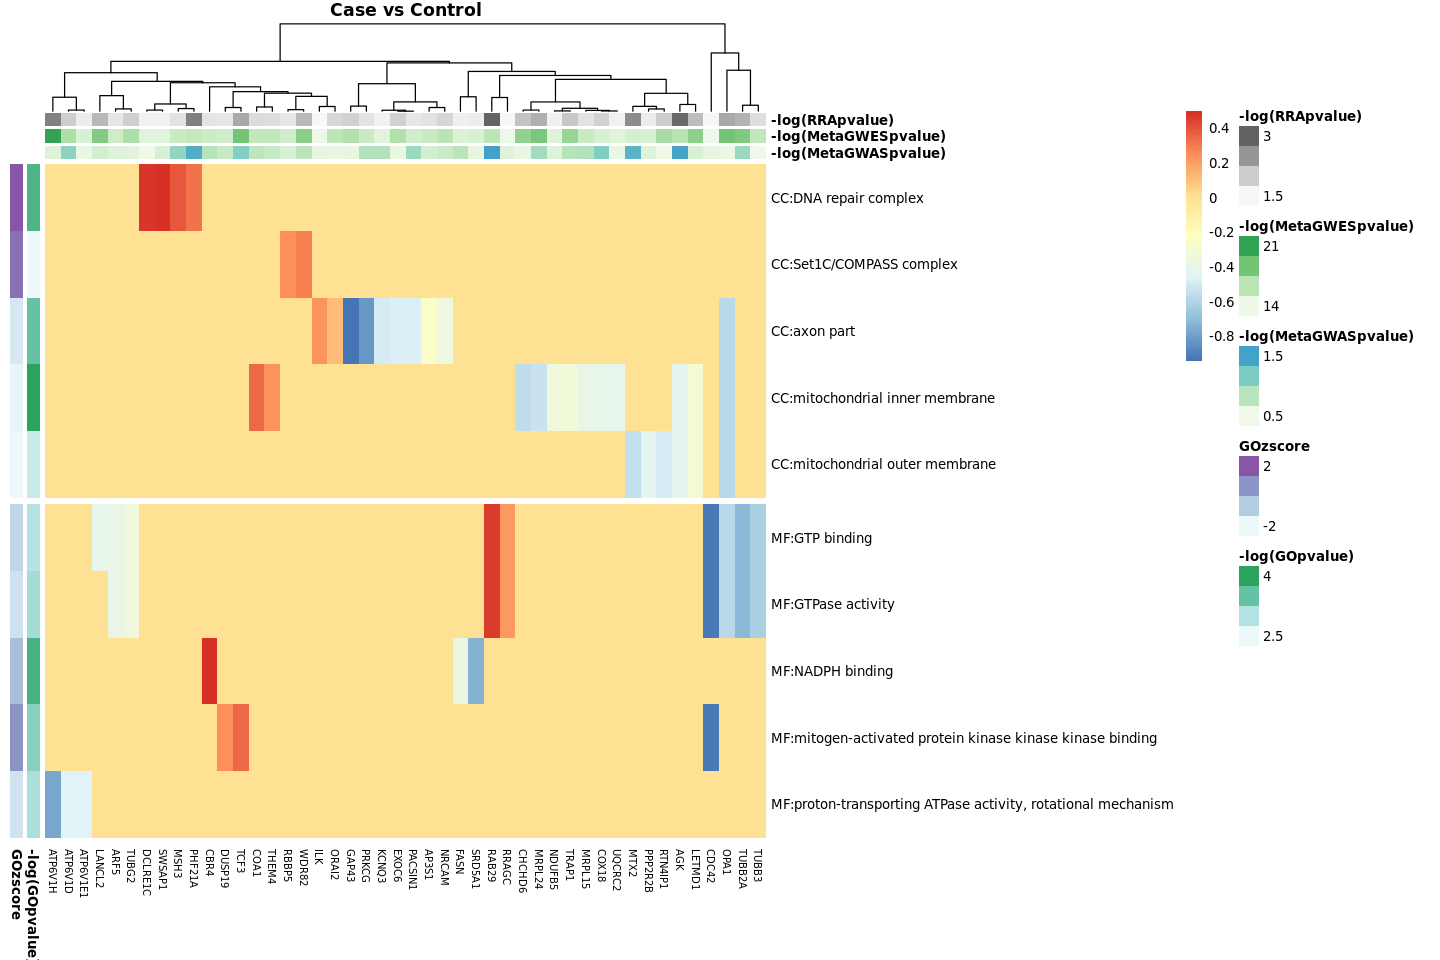

In [51]:
pheatmap(cell.data2, annotation_col = annotation_col, annotation_row = annotation_row,  cluster_rows = FALSE, gaps_row = c(5,10),fontsize = 8, fontsize_row = 8, fontsize_col = 6,main = "Case vs Control") #, border_color="black"


In [55]:
#pdf(file="pheatmapCaseControl.pdf")
#pheatmap(cell.data2, annotation_col = annotation_col, annotation_row = annotation_row,  cluster_rows = FALSE, gaps_row = c(5,10) ,fontsize = 8, fontsize_row = 8, fontsize_col = 6,main = "Case vs Control")
#dev.off()

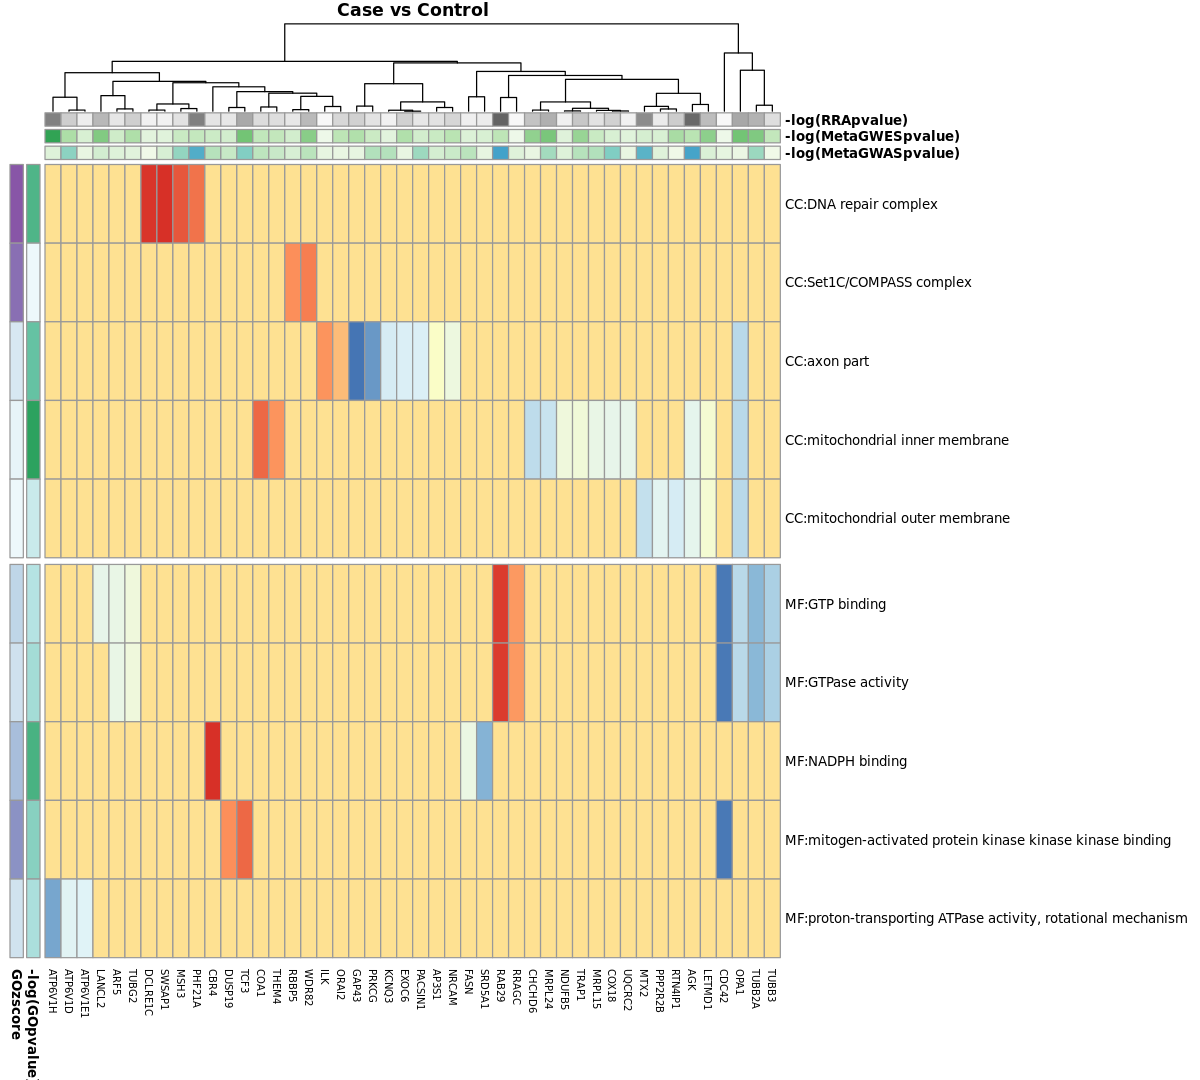

In [54]:
# if leyend=FALSE, the plot is bigger and cell have borders
options(repr.plot.width=10, repr.plot.height=9)
pheatmap(cell.data2, annotation_col = annotation_col, annotation_row = annotation_row,cluster_rows = FALSE, gaps_row = c(5,10),fontsize = 8, fontsize_row = 8, fontsize_col = 6,main = "Case vs Control",legend = FALSE,annotation_legend = FALSE)
